# Part I - (Ford GoBike System Data)
## by Dina Alade



### Table of Content
- [Introduction](#-Introduction)
- [Preliminary Wrangling](#-Preliminary-Wrangling)
- [Univariant Exploration](#-Univariant-Exploration)
- [Bivariant Exploration](#-Bivariant-Exploration)
- [Multivariant Exploration](#-Multivariant-Exploration)
- [Conclusion](#-Conclusion)

## Introduction

> I analyzed Ford GoBike dataset. I used Python libraries like pandas, seaborn, numpy and matplotlib. The Dataset collects information from over 183k data of Bike rides. It consists of different features of user data and time.


## Dataset
It consists of 183412 rows 16 columns

Duration_sec - Trip Duration
Start_time - Time the trip starts
End_time - Time the trip ends
Start_station_id - ID number of the station the trip started from
Start_station_name - Name of the station the trip started from
Start_station_latitude - Latitude of station the trip started from
Start_station_longitude - Longitude of station the trip started from
End_station_id - ID number of the station the trip ended
End_station_name - Name of the station the trip ended
End_station_latitude - Latitude of station the trip ended
End_station_longitude - Longitude of station the trip ended
Bike_id - ID of the bikes used
Member_birth_year - Year the Bike users were born
Member_gender - Gender of the Bike Users
Bike_share_for_all_trip - If bike trips were shared or not.








## Preliminary Wrangling

In [1]:
#load necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load dataset using pandas
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#check the shape of the dataset
df.shape

(183412, 16)

In [4]:
#check the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#check the datasets summary statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
#check for missing values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
#check for the datasets data types
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [8]:
#check for duplicates
df.duplicated().sum()

0

#### check for unique values gender, station names and user type

In [9]:
df['member_gender'].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [10]:
df['start_station_name'].nunique()

329

In [11]:
df['start_station_name'].unique()

array(['Montgomery St BART Station (Market St at 2nd St)',
       'The Embarcadero at Steuart St', 'Market St at Dolores St',
       'Grove St at Masonic Ave', 'Frank H Ogawa Plaza',
       '4th St at Mission Bay Blvd S', 'Palm St at Willow St',
       'Washington St at Kearny St', 'Post St at Kearny St',
       'Jones St at Post St',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)',
       'Valencia St at 21st St', 'Channing Way at Shattuck Ave',
       'Bancroft Way at College Ave', 'Howard St at Mary St',
       '22nd St at Dolores St', 'Laguna St at Hayes St',
       '5th St at Folsom', 'Telegraph Ave at 23rd St',
       'Page St at Scott St', 'Lake Merritt BART Station',
       'West St at 40th St', 'The Embarcadero at Sansome St',
       'Folsom St at 9th St', 'University Ave at Oxford St',
       'MLK Jr Way at University Ave', 'The Embarcadero at Bryant St',
       '17th St at Valencia St', 'Valencia St at 16th St',
       'Valencia St at 22nd St', 'Fran

In [12]:
df['end_station_name'].nunique()

329

In [13]:
df['end_station_name'].unique()

array(['Commercial St at Montgomery St', 'Berry St at 4th St',
       'Powell St BART Station (Market St at 4th St)',
       'Central Ave at Fell St', '10th Ave at E 15th St',
       'Broadway at Kearny', 'San Jose Diridon Station',
       'Valencia St at 21st St', 'Mission Playground',
       'San Francisco Public Library (Grove St at Hyde St)',
       'Bryant St at 2nd St', 'Shattuck Ave at Hearst Ave',
       'Channing Way at Shattuck Ave', '8th St at Ringold St',
       'Broderick St at Oak St', 'Potrero Ave and Mariposa St',
       'Market St at Franklin St', 'Telegraph Ave at 23rd St',
       '17th St at Dolores St',
       '6th Ave at E 12th St (Temporary Location)',
       'McAllister St at Baker St', 'Telegraph Ave at Carleton St',
       'Genoa St at 55th St', 'Grand Ave at Perkins St',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Folsom St at 9th St', 'Channing Way at San Pablo Ave',
       '2nd St at Townsend St', 'Pierce St at Haight St',
       'Po

In [14]:
df['user_type'].nunique()

2

In [15]:
df['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

Brief summary of assessment done

- The dataset has 183412 rows and 16 columns
- Since the time column is in the wrong datatype, it will be changed to datetime
- Null values will be fixed
- There are no duplicates in the dataset
- There are 329 stations used in the dataset


## Cleaning

In [16]:
#change start and end time to datetime 
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)
df['member_birth_year'] = pd.to_datetime(df.member_birth_year)

In [17]:
#check for change
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year          datetime64[ns]
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [18]:
#change bike id to string
df['bike_id'] = df['bike_id'].astype('object')

In [19]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year          datetime64[ns]
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [20]:
#check bike share for all trips unique values
df['bike_share_for_all_trip'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
#drop columns not needed
df = df[['start_time', 'end_time', 'duration_sec', 'start_station_name', 'end_station_name', 'bike_id', 'user_type', 'member_gender', 'member_birth_year', 'bike_share_for_all_trip']]

In [22]:
#view
df.head()

,start_time,end_time,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_gender,member_birth_year,bike_share_for_all_trip
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,1970-01-01 00:00:00.000001984,No
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,42521,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaT,No
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,1970-01-01 00:00:00.000001972,No
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,36490,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,1970-01-01 00:00:00.000001989,No
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,1585,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,1970-01-01 00:00:00.000001974,Yes


In [23]:
#extract the days of the week, hours, and month from start and end time
df['start_weekday'] = df['start_time'].dt.weekday
df['start_date'] = df['start_time'].dt.day
df['start_hour'] = df['start_time'].dt.hour

In [24]:
#extract for end time: hour
df['end_hour'] = df['end_time'].dt.hour

In [25]:
df.head()

,start_time,end_time,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_gender,member_birth_year,bike_share_for_all_trip,start_weekday,start_date,start_hour,end_hour
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,1970-01-01 00:00:00.000001984,No,3,28,17,8
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,42521,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaT,No,3,28,18,6
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,1970-01-01 00:00:00.000001972,No,3,28,12,5
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,36490,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,1970-01-01 00:00:00.000001989,No,3,28,17,4
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,1585,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,1970-01-01 00:00:00.000001974,Yes,3,28,23,0


In [26]:
#check for null values and drop null values
df.isna().sum()

start_time                    0
end_time                      0
duration_sec                  0
start_station_name          197
end_station_name            197
bike_id                       0
user_type                     0
member_gender              8265
member_birth_year          8265
bike_share_for_all_trip       0
start_weekday                 0
start_date                    0
start_hour                    0
end_hour                      0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
#view change
df.isna().sum()

start_time                 0
end_time                   0
duration_sec               0
start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_gender              0
member_birth_year          0
bike_share_for_all_trip    0
start_weekday              0
start_date                 0
start_hour                 0
end_hour                   0
dtype: int64

### What is the structure of the dataset
> The dataset has 183412 rows and 16 columns, with both numerical and categorical features.
    > The categorical columns have the following labels
        > User type - Subscriber and Customer
        > Member Gender - Male, Female and Other
        > Bike Share - Yes or No



### What is/are the main feature(s) of interest in your dataset?
> The time feature, to see how time affects other features



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> 1. The End time column to determine the duration of bike rental
> 2. Start and End Station names to know which stations have the most activity
> 3. Bike id to know the most used bikes and time used
> 4. User Type to know which type of users rent bikes the most
> 5. Member Gender to know the gender that use bikes often
> 6. Bike share for all trip

## Univariate Exploration

Check the frequency and count of some variables to see the activity

First, i will start with weekday

#### What day of the week had the most rental in 2019?

In [29]:
#make a copy of the cleaned datset
df_new = df.copy()
df_new.head()

,start_time,end_time,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_gender,member_birth_year,bike_share_for_all_trip,start_weekday,start_date,start_hour,end_hour
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,1970-01-01 00:00:00.000001984,No,3,28,17,8
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,1970-01-01 00:00:00.000001972,No,3,28,12,5
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,36490,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,1970-01-01 00:00:00.000001989,No,3,28,17,4
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,1585,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,1970-01-01 00:00:00.000001974,Yes,3,28,23,0
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,1793,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,Male,1970-01-01 00:00:00.000001959,No,3,28,23,0


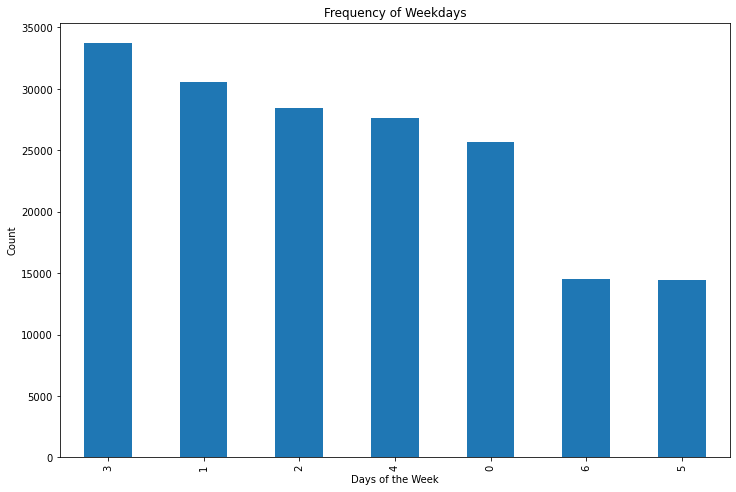

In [30]:
#Use bar plot to view the frequency of weekdays
df_new.start_weekday.value_counts().plot(kind='bar', figsize=(12, 8))
plt.title('Frequency of Weekdays')
plt.xlabel('Days of the Week')
plt.ylabel('Count');

In [31]:
#check the weekdays value count
df_new.start_weekday.value_counts()

3    33712
1    30584
2    28426
4    27663
0    25641
6    14512
5    14414
Name: start_weekday, dtype: int64

Monday starts from 0, according to the plot the day of the week that had the most rentals is Thursday(3) with a count of 33712. The next top 2 days were Tuesday and Wednesday. 

Saturday had the least amount of rentals in February, 2019.







#### What day in February had the highest rental rate?
Find out the day in the month of February experinced the highest amount of activity

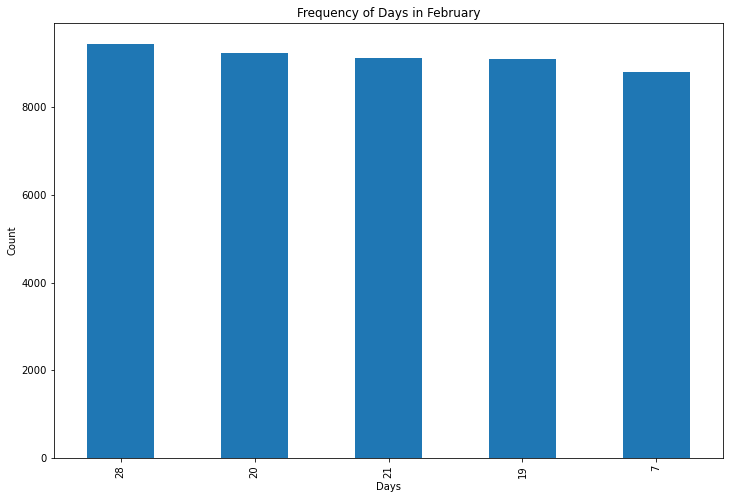

In [32]:
#Use bar plot to view the frequency of days in February
df_new.start_date.value_counts().head().plot(kind='bar', figsize=(12, 8))
plt.title('Frequency of Days in February')
plt.xlabel('Days')
plt.ylabel('Count');

In [33]:
#check the days value count
df_new.start_date.value_counts().head()

28    9448
20    9246
21    9120
19    9096
7     8798
Name: start_date, dtype: int64

The 28th of February had the highest rental rate. The plot above shows a lot of people rented bikes the most that month, with a count of 9448.



### What are the hours of the day with the highest rush?

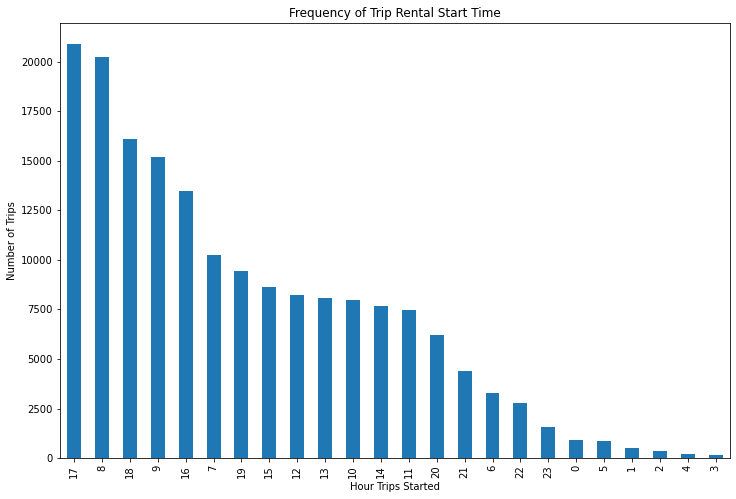

In [34]:
#use bar plot to get the frequency of when trips start
df_new.start_hour.value_counts().plot(kind='bar', figsize=(12, 8))
plt.title('Frequency of Trip Rental Start Time')
plt.xlabel('Hour Trips Started')
plt.ylabel('Number of Trips');

From the above plot, the hour with the highest rate is at 5PM

Morning rush is highest at 8AM then 9AM

Evening rush hour is 5PM and 6PM

From 12AM - 5AM, order rate is at the lowest point






### What type of users use the Bikes more?

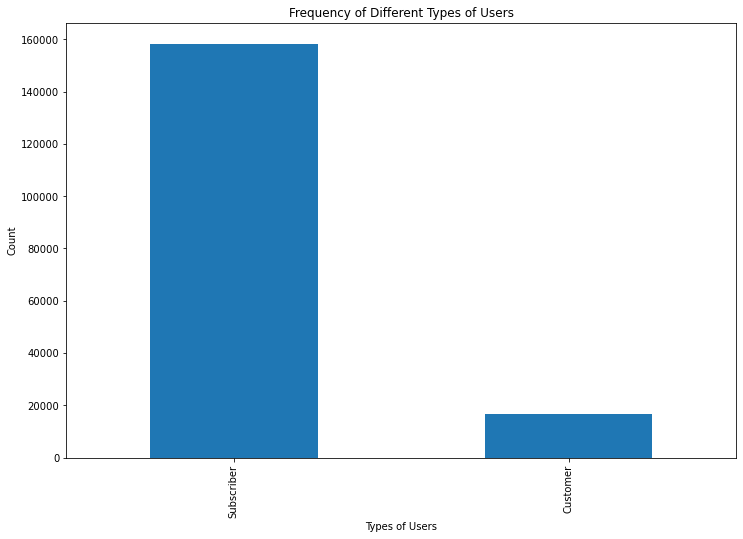

In [35]:
#Use bar plot to view the frequency of user type
df_new.user_type.value_counts().plot(kind='bar', figsize=(12, 8))
plt.title('Frequency of Different Types of Users')
plt.xlabel('Types of Users')
plt.ylabel('Count');

In [36]:
#check the count
df_new.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

From the above plot, people that rent bikes more tend to be Subcribers. Non-subscribers have a low count.

This implies that customers end up being returning customers and create subscriptions

### What Gender makes use of Bikes more?

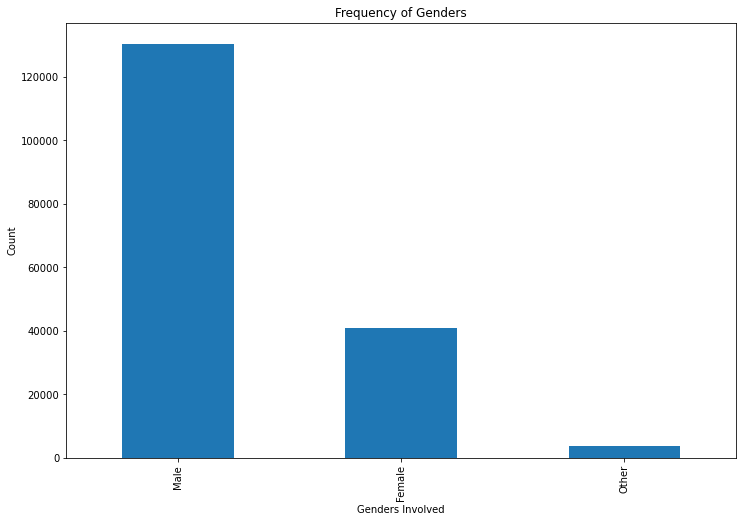

In [37]:
#Use bar plot to view the frequency of genders
df_new.member_gender.value_counts().plot(kind='bar', figsize=(12, 8))
plt.title('Frequency of Genders')
plt.xlabel('Genders Involved')
plt.ylabel('Count');

In [38]:
#check the value count
df_new.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

From the above plot and value count, Males are the most users with a count of over 130k in the month of February. Next are Females with a count of 40 thousand then other genders.

### What does the duration distribution look like, and what is the highest trip duration?

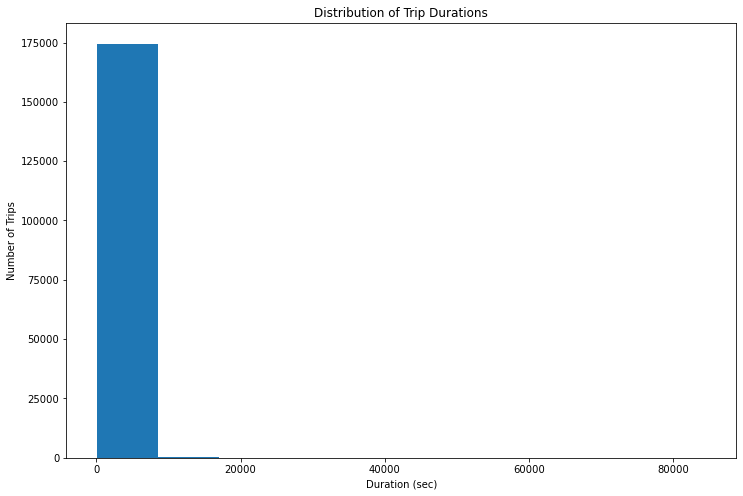

In [39]:
#Use histogram to determine the duration distribution which is in seconds
plt.figure(figsize=(12, 8))
plt.hist(data = df_new, x = 'duration_sec')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips');

From the plot above, it shows there is a tail but it isn't visible, the bin size should be adjusted

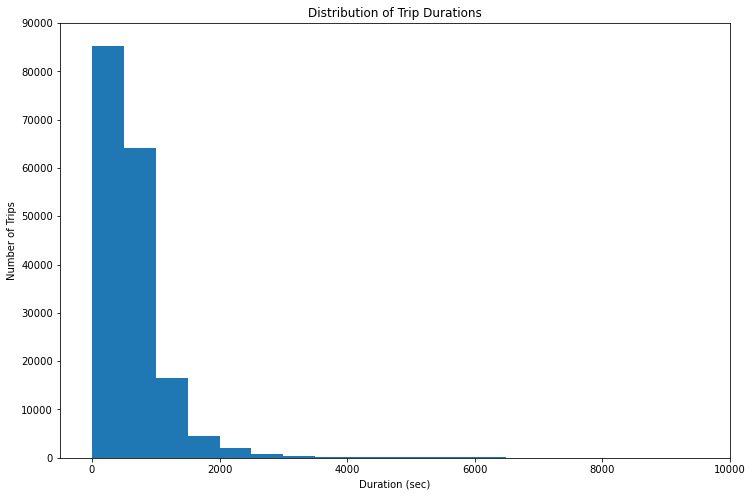

In [40]:
binsize = 500
bins = np.arange(0, df_new['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=(12, 8))
plt.hist(data = df_new, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()

There is a long tail in the plot, a log scale will be used

C:\Users\Toyin Alade\AppData\Local\Temp\ipykernel_11188\3152124308.py:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 10000, 0, 15000])


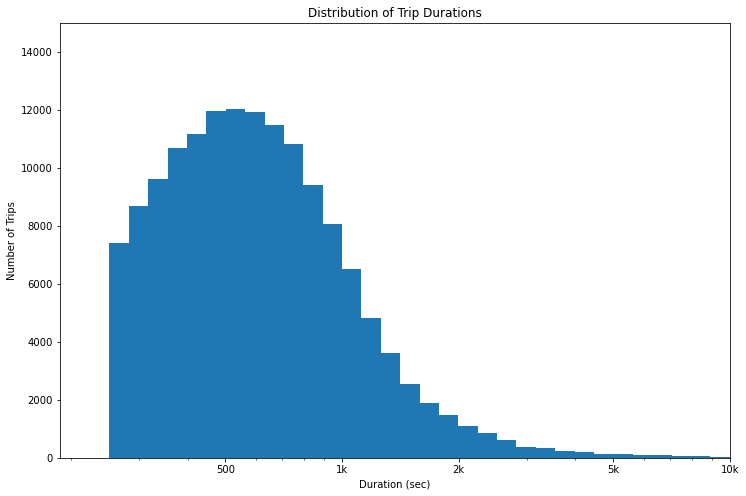

In [41]:
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(df_new['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=(12, 8))
plt.hist(data = df_new, x = 'duration_sec', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show();

The trip duration has more concentration for higher duration. Most of the values are less than 2000 seconds. It has a peak around 600 seconds. Trip duration values first increases starting from around 7000 values but then starts to fall and reaches
below 2000 values under 2000 sec.

The data is skewered to the right

In [42]:
# highest trip duration
df_new.duration_sec.max()

84548

### What are the top 10 stations bike trips start from?

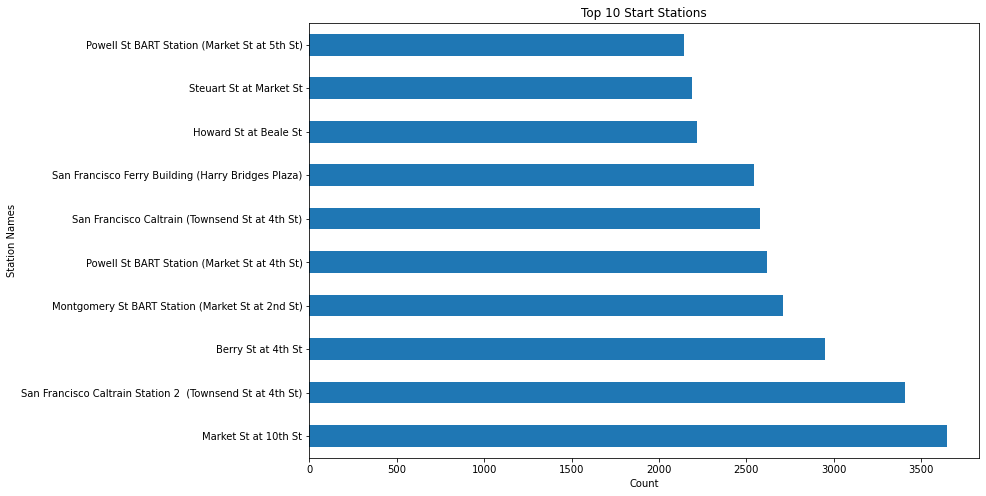

In [43]:
#Use bar plot to view the top 10 start stations
df_new.start_station_name.value_counts().head(10).plot(kind='barh', figsize=(12, 8))
plt.title('Top 10 Start Stations')
plt.xlabel('Count')
plt.ylabel('Station Names');

From the plot above, Market St at 10th St has the highest count, this is the station that most rides start from.

### What are the top 10 stations bike trips stop?

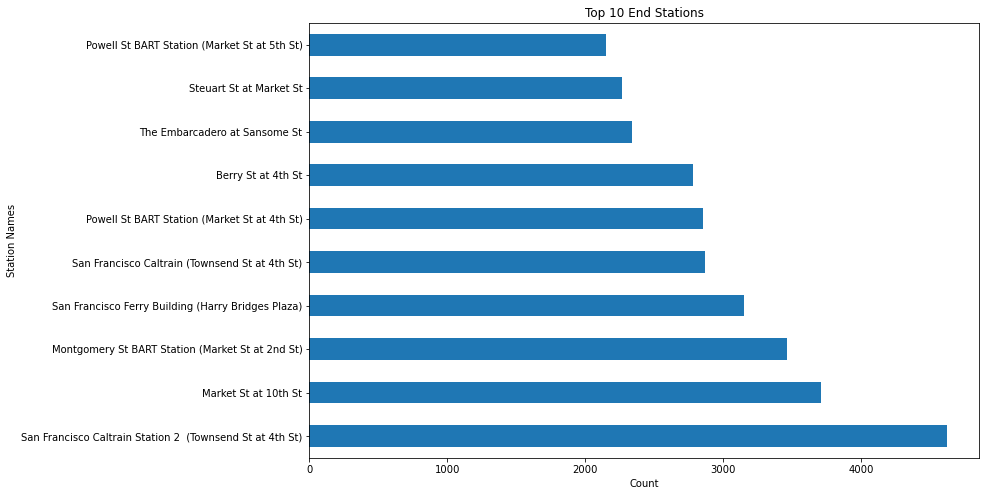

In [44]:
#Use bar plot to view the top 10 end stations
df_new.end_station_name.value_counts().head(10).plot(kind='barh', figsize=(12, 8))
plt.title('Top 10 End Stations')
plt.xlabel('Count')
plt.ylabel('Station Names');

From the plot above, San Francisco Caltrain station 2 has the highest count, this is the station that most rides end.

Market St at 10th St has the second highest count here

### What amount of the trip was shared?

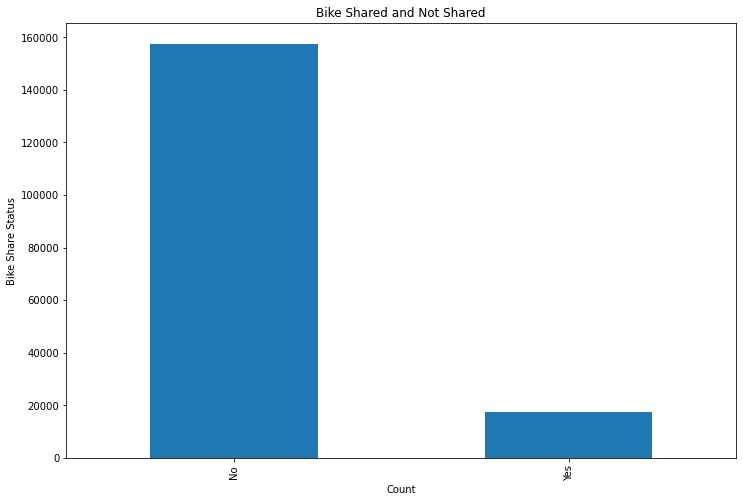

In [45]:
#first, create a bar plot to show the trips that were shared and those that were not
df_new.bike_share_for_all_trip.value_counts().plot(kind='bar', figsize=(12, 8))
plt.title('Bike Shared and Not Shared')
plt.xlabel('Count')
plt.ylabel('Bike Share Status');

A large amount of people did not share their bike trip

Next, let the count be viewed

In [46]:
df_new.bike_share_for_all_trip.value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

A very high amount of people did not share their bike trips. A total of 157606 did not share while 17346 shared

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Transformation was done on the duration histogram plot

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Logarithimic scaling was done to get a deeper analysis on the duration data

## Bivariate Exploration

In [47]:
df_new.head()

,start_time,end_time,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_gender,member_birth_year,bike_share_for_all_trip,start_weekday,start_date,start_hour,end_hour
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,1970-01-01 00:00:00.000001984,No,3,28,17,8
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,1970-01-01 00:00:00.000001972,No,3,28,12,5
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,36490,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,1970-01-01 00:00:00.000001989,No,3,28,17,4
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,1585,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,1970-01-01 00:00:00.000001974,Yes,3,28,23,0
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,1793,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,Male,1970-01-01 00:00:00.000001959,No,3,28,23,0


### Does Gender determine if Bike Trips will be shared or not?


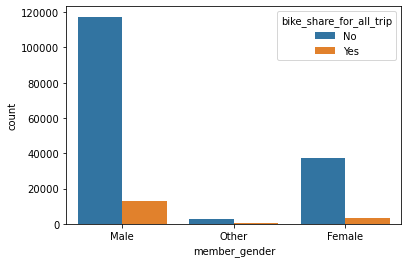

In [48]:
# A count plot will be used to analyse gender and bike trip share

sns.countplot(data = df_new, x = 'member_gender', hue = 'bike_share_for_all_trip');

From the above count plot these are the observations;
- More men tend to not share the bike trips compared to other genders
- More men compared to other genders share their trips
- Females too tend to not share their trips
- Other genders asides male and female have the least count in bike trip sharing

In [49]:
#use groupby to view the count
df_new.groupby('member_gender')['bike_share_for_all_trip'].value_counts()

member_gender  bike_share_for_all_trip
Female         No                          37211
               Yes                          3594
Male           No                         117396
               Yes                         13104
Other          No                           2999
               Yes                           648
Name: bike_share_for_all_trip, dtype: int64

### Does Gender determine if Customers turn into Subscribers or not

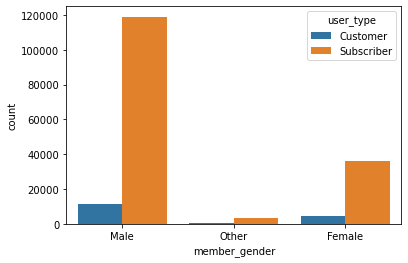

In [50]:
# A count plot will be used to analyse gender and User type

sns.countplot(data = df_new, x = 'member_gender', hue = 'user_type');

From the above plot, men have the closest tendency to be subscribers and the closest ratio between subscibers and customers

Other gender has the farthest ratio between subscribers and customers

### What Days of the Week Experience the longest Rides? 
When in the month of February 2019 did riders ride the most?


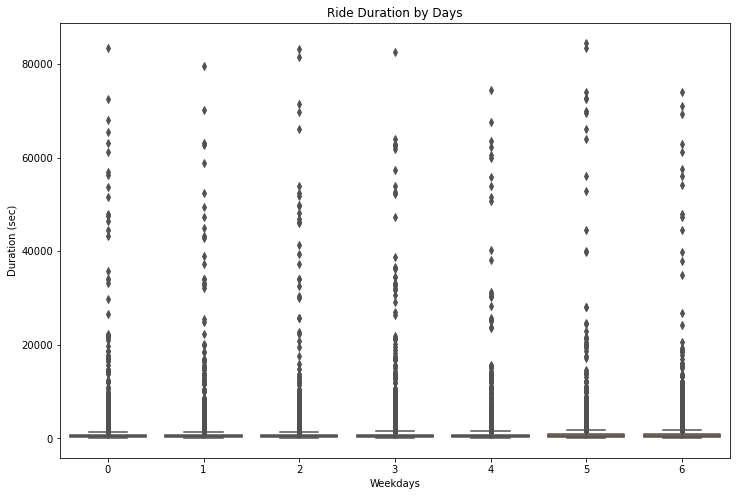

In [51]:
#use box plot to view the ride duration by days
plt.figure(figsize = (12, 8))
base_color = sns.color_palette()[1]
sns.boxplot(data = df_new, x = 'start_weekday', y = 'duration_sec', color = base_color)
plt.title('Ride Duration by Days')
plt.xlabel('Weekdays')
plt.ylabel('Duration (sec)')
plt.show()

The values are vey widespread to see a box plot, so lets trim duration to max 3000 seconds to get clearer picture.

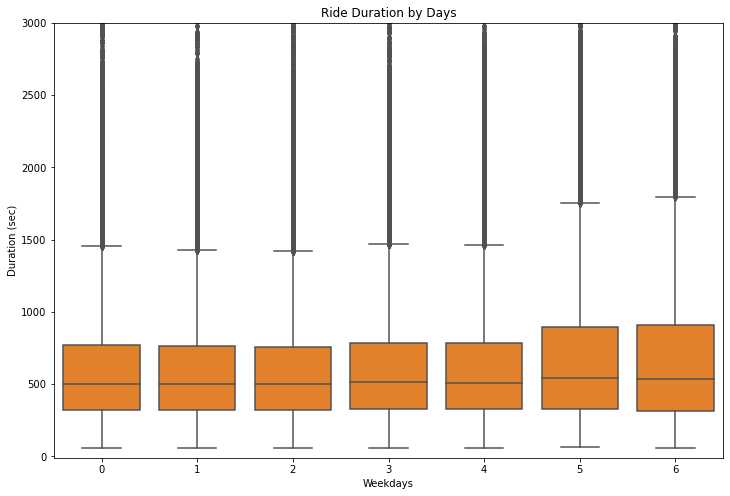

In [52]:
#trim the y axis
plt.figure(figsize = (12, 8))
base_color = sns.color_palette()[1]
sns.boxplot(data = df_new, x = 'start_weekday', y = 'duration_sec', color = base_color)
plt.ylim([-10, 3000])
plt.title('Ride Duration by Days')
plt.xlabel('Weekdays')
plt.ylabel('Duration (sec)')
plt.show()

From the plot above, it shows that trips made during the weekend take longer than trips done during the week.

### Which User Type takes the time?

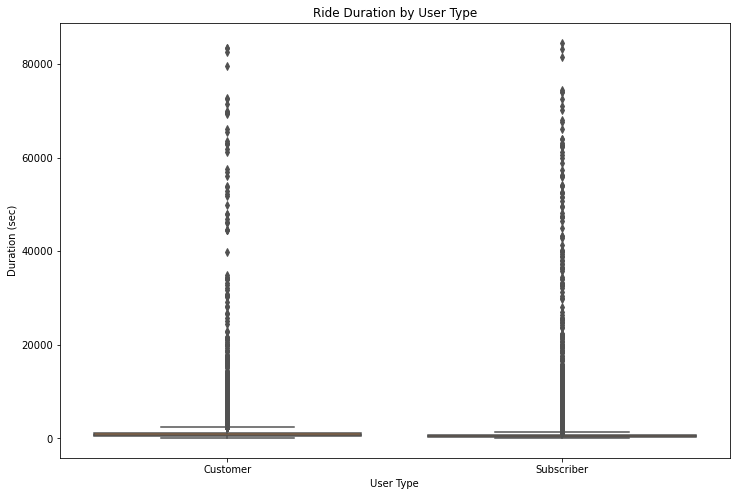

In [53]:
#use box plot to view the ride duration by user type
plt.figure(figsize = (12, 8))
base_color = sns.color_palette()[1]
sns.boxplot(data = df_new, x = 'user_type', y = 'duration_sec', color = base_color)
plt.title('Ride Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show()

The values are vey widespread to see a box plot, so lets trim duration to max 3000 seconds to get clearer picture.

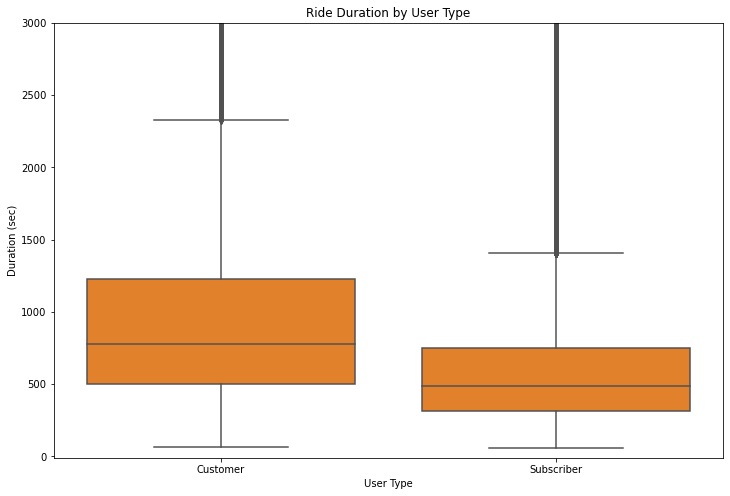

In [54]:
#trim the ylim
plt.figure(figsize = (12, 8))
base_color = sns.color_palette()[1]
sns.boxplot(data = df_new, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 3000])
plt.title('Ride Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show()

From the plot above, Customer user type trips take a longer duration than subscriber user type

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Weekends are big determinants of duration as durations are higher during the weekends compared to during the week. Though customer to subscriber ratio is high, they tend to have longer durations.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> A lot of men tend to be subscribers rather than just customers and they do not really share their bike trips compared to females and other genders. 

## Multivariate Exploration

In [55]:
df_new.head()

,start_time,end_time,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_gender,member_birth_year,bike_share_for_all_trip,start_weekday,start_date,start_hour,end_hour
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,1970-01-01 00:00:00.000001984,No,3,28,17,8
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,1970-01-01 00:00:00.000001972,No,3,28,12,5
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,36490,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,1970-01-01 00:00:00.000001989,No,3,28,17,4
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,1585,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,1970-01-01 00:00:00.000001974,Yes,3,28,23,0
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,1793,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,Male,1970-01-01 00:00:00.000001959,No,3,28,23,0


### What is the Distribution between Gender, User Type and Birth Year with time?
Let's see if a relationship can be seen between gender, user type and birth year with time(duration)

In [56]:
#create a function
def hist2dgrid(x, y, **kwargs):
    """ Creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    y_bins = 10 ** np.arange(1.7, 4.3+0.1, 0.1)
    y_ticks = [100, 300, 1000, 3000, 10000]
    y_labels = [100, 300, '1k', '3k', '10k']
    
    plt.hist2d(x, y, bins = [10, y_bins], cmap = palette, cmin = 100)
    plt.yscale('log')
    plt.yticks(y_ticks, y_labels)

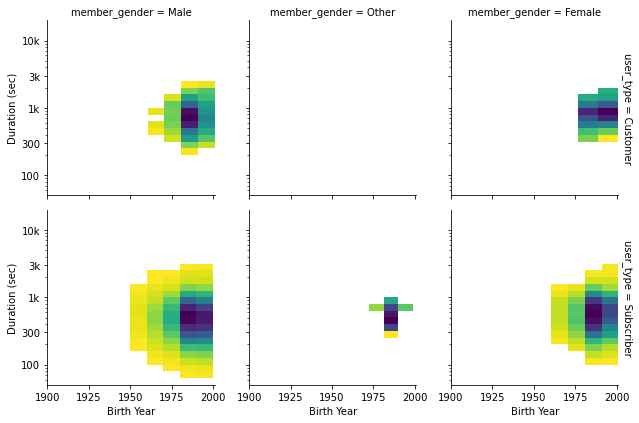

In [57]:
# plot the heatmap
g = sns.FacetGrid(data=df_new, col='member_gender', row='user_type', margin_titles=True)
g.map(hist2dgrid, 'member_birth_year', 'duration_sec', color='viridis_r')
g.set_xlabels('Birth Year')
g.set_ylabels('Duration (sec)');

The peak of distribution for different people is nearly the same. However, the male subscriber accounts for a major proportion. The male subscribers spent longer times during rides and were born mostly between 1950 - 2000




### what is the relationship between gender and user type with time?

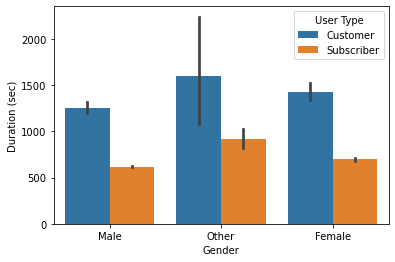

In [58]:
# plot the relationship between user type and gender
sns.barplot(data=df_new, x='member_gender', y='duration_sec', hue='user_type')
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.legend(title='User Type');

The customer has a larger duration than the subscriber. The other gender's customer's duration is the largest one.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The peak of distribution for different people is nearly the same. However, the male subscriber accounts for a major proportion. The customer has a larger duration than the subscriber.

### Were there any interesting or surprising interactions between features?

> The average duration of customer decreases rapidly.

## Conclusions
> Different features in the dataset respond differently with time. 
> There ia a very large proportion of men, subcribers and people who do not share ride trips compared to other features.
> Times the data viewed in a boxplot was clumped together, the y axis had to be trimmed
> Plotting a histogram to show the distribution of the duration, the x axis had to be changed to a logarithimic scale
> Overall, it is a fun dataset to work with